# How to apply conditional filter in pandas datarframe

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('belle2')

In [42]:
df =  pd.read_csv('file.csv')
df.head()

,R2,cosTBTO
0,0.203425,0.177232
1,0.059065,0.126159
2,0.161184,0.735997
3,0.063381,0.053690
4,0.285085,0.955842


We try to  apply a filter on the dataframe, but it is conditional
* if R2 < 0.2 cosTBTO > 0.7 
* if R2 > 0.2 cosTBTO > 0.3 

But first let's look how the overall distrbution for unfiltered dataframe

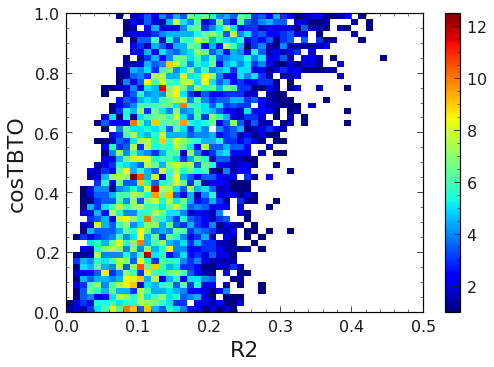

In [43]:
plt.hist2d(df['R2'],df['cosTBTO'],cmap=plt.cm.jet,bins=(50,50),density=True,
               cmin=1,# null pixel
           range=[[0,0.5],[0,1.0]])        
plt.colorbar()
plt.xlabel('R2')
plt.ylabel('cosTBTO')

plt.show()

## `pd.eval` and `pd.query` method

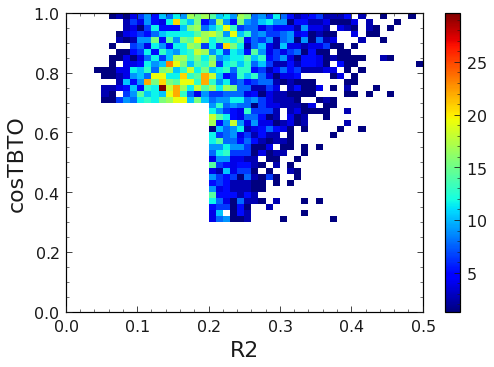

In [38]:
df.eval('tag1 = R2 < 0.2 and cosTBTO > 0.7', inplace = True)
df.eval('tag2 = R2 > 0.2 and cosTBTO > 0.3', inplace = True)
df1  = df.query('tag1 or tag2').copy()

## or simply 

#df1  = df.query('(R2 < 0.2 and cosTBTO > 0.7) or (R2 > 0.2 and cosTBTO > 0.3)').copy()

#----------- PLOTTING-------------------
plt.hist2d(df1['R2'],df1['cosTBTO'],cmap=plt.cm.jet,bins=(50,50),density=True,
               cmin=1,# null pixel
           range=[[0,0.5],[0,1.0]])        
plt.colorbar()
plt.xlabel('R2')
plt.ylabel('cosTBTO')
plt.show()

## `df.apply` method for complex condition filter use function (which may have been provided)

In [39]:
def fun(row):
    
    R2 = row['R2']
    cosTBTO = row['cosTBTO']
    
    if R2 < 0.2 and cosTBTO > 0.7:
        return 1
    elif R2 > 0.2 and cosTBTO > 0.3:
        return 1
    else:
        return 0

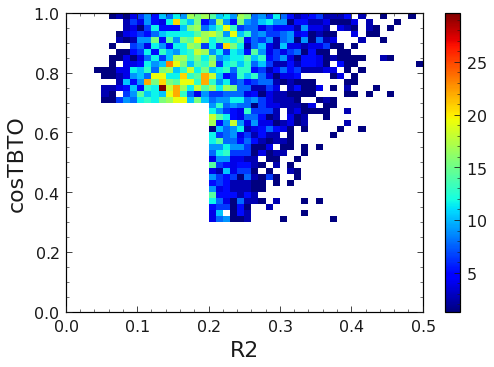

In [40]:
df.loc[:,'Tag'] = df.apply(fun, axis=1)
df.query('Tag == 1', inplace = True)

#----------- PLOTTING-------------------
plt.hist2d(df['R2'],df['cosTBTO'],cmap=plt.cm.jet,bins=(50,50),density=True,
               cmin=1,# null pixel
           range=[[0,0.5],[0,1.0]])        
plt.colorbar()
plt.xlabel('R2')
plt.ylabel('cosTBTO')
plt.show()